<a href="https://colab.research.google.com/github/Anirudh-Mishra/DS_Salary_Analysis/blob/main/UChicago_Coding_Suppl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
# IMPORTING LIBRARIES
import seaborn
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [147]:
# INGESTING DATA FROM CSV
df = pd.read_csv('ds_salaries.csv')
df.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


In [148]:
# DROPPING UNNECESSARY COLUMNS
df.drop(['Unnamed: 0','salary','salary_currency'], axis=1, inplace=True)
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

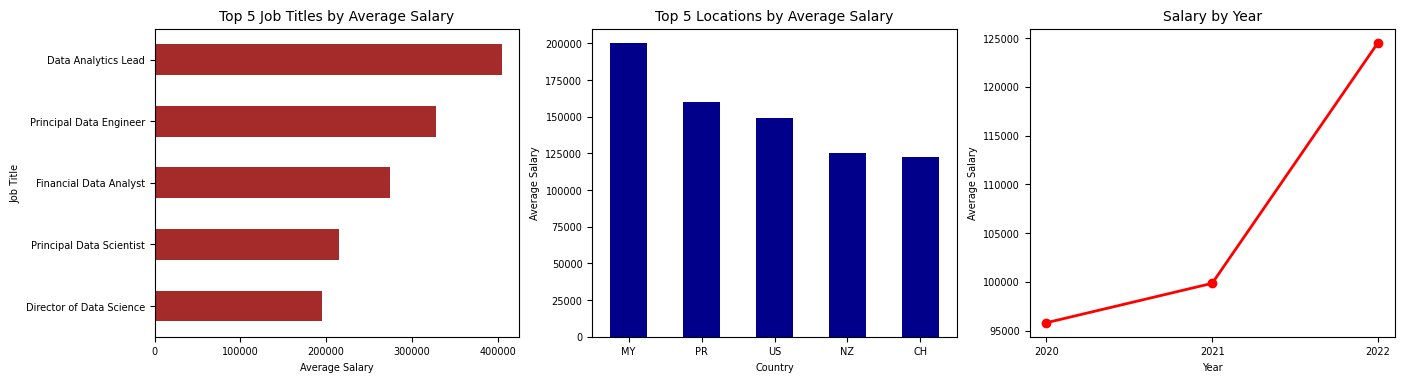

<Figure size 400x200 with 0 Axes>

In [149]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# TOP 5 JOB TITLES BY AVG JOB SALARY
top_salaries_by_job_title = df.groupby('job_title')['salary'].mean().sort_values(ascending=False).head(5)
top_salaries_by_job_title.plot(kind='barh', color='brown', fontsize=7, ax=axes[0])
axes[0].set_title("Top 5 Job Titles by Average Salary", fontsize=10)
axes[0].set_xlabel("Average Salary", fontsize=7)
axes[0].set_ylabel("Job Title", fontsize=7)
axes[0].invert_yaxis()

# TOP 5 EMPLOYEE RESIDENCES BY AVG JOB SALARY
top_salaries_by_employee_residence = df.groupby('employee_residence')['salary'].mean().sort_values(ascending=False).head(5)
top_salaries_by_employee_residence.plot(kind='bar', color='darkblue', fontsize=7, ax=axes[1])
axes[1].set_title("Top 5 Locations by Average Salary", fontsize=10)
axes[1].set_xlabel("Country", fontsize=7)
axes[1].set_ylabel("Average Salary", fontsize=7)
axes[1].tick_params(axis='x', rotation=0, labelsize=7)

# TREND IN AVG SALARIES BY YEAR
salary_by_year = df.groupby('work_year')['salary'].mean()
salary_by_year.plot(kind='line', marker='o', color='red', linewidth=2, fontsize=7, ax=axes[2])
axes[2].set_title("Salary by Year", fontsize=10)
axes[2].set_xlabel("Year", fontsize=7)
axes[2].set_ylabel("Average Salary", fontsize=7)
axes[2].set_xticks(salary_by_year.index)

* From plot 1, we can infer that an average Data Analytics Lead earns the highest(405,000 USD/year).
* From plot 2, we can infer that employees residing in Malaysia, Puerto Rico, United States, New Zealand and China are among the top earner with Malaysia leading the bunch.
* From plot 3, we see a sharp increase in the earnings of employees during the year 2022, probably due to relaxation of restrictions as a result of the COVID-19 pandemic.




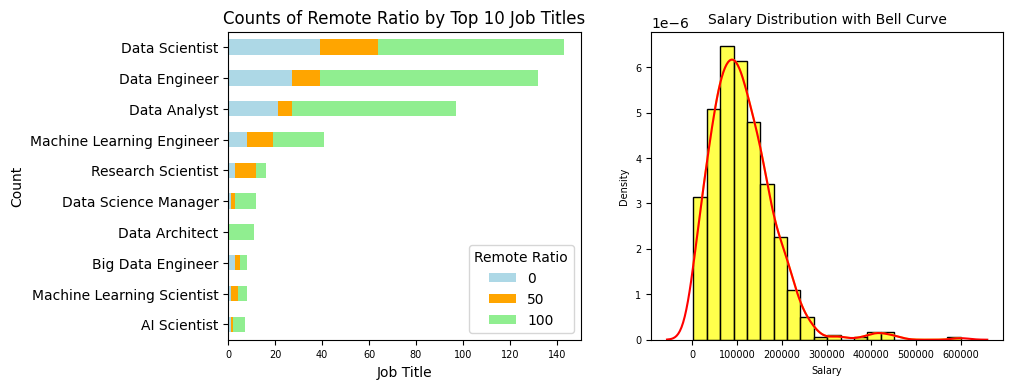

In [161]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# REMOTE RATIO OF TOP 10 JOBS
job_counts = pd.crosstab(df['job_title'], df['remote_ratio'])
top_jobs = job_counts.sum(axis=1).nlargest(10).index
top_job_counts = job_counts.loc[top_jobs]
top_job_counts.plot(kind='barh', stacked=True, color=['lightblue', 'orange', 'lightgreen'], ax=axes[0])

axes[0].set_xlabel('Job Title')
axes[0].set_ylabel('Count')
axes[0].set_title('Counts of Remote Ratio by Top 10 Job Titles')
axes[0].legend(title='Remote Ratio')
axes[0].tick_params(axis='x', labelsize=7)
axes[0].invert_yaxis()

# SALARY DISTRIBUTION OF ALL DATA SCIENCE ROLES
seaborn.histplot(df['salary'], kde=True, bins=20, color='yellow', edgecolor='black', stat='density', alpha=0.7, ax=axes[1])
seaborn.kdeplot(df['salary'], color="red", ax=axes[1])

axes[1].set_title("Salary Distribution with Bell Curve", fontsize=10)
axes[1].set_xlabel("Salary", fontsize=7)
axes[1].set_ylabel("Density", fontsize=7)
axes[1].tick_params(axis='x', labelsize=7)
axes[1].tick_params(axis='y', labelsize=7)


* Plot 1 tells us about the remote ratio of top 10 job roles by employee count.
* Plot 2 helps us with the salary distribution of the bell curve, with its median coming near 100,000 USD/year

In [140]:
# FUNCTION FOR ENCODING ALL CATEGORICAL COLUMNS
def encode_categorical_columns(df):
  """
  Label encode all categorical columns to compute correlation

  Parameters:
  - df: Input pandas DataFrame.

  Returns:
  - None (Modifies dataframe in place).
  """
  for i in df.select_dtypes(include='object'):
      df[i] = LabelEncoder().fit_transform(df[i])

In [141]:
# FUNCTION FOR PLOTTING CORRELATION MATRIX
def plot_correlation_matrix(df):
  """
  Plots the heatmap of correlation matrix for all columns in the DataFrame.

  Parameters:
  - df: Input pandas DataFrame.

  Returns:
  - None (visualizes the correlation matrix).
  """
  encode_categorical_columns(df)

  plt.figure(figsize=(7, 5))
  corr_matrix = df.corr()
  seaborn.heatmap(corr_matrix, annot=True, cmap=seaborn.color_palette("ch:s=-.2,r=.6", as_cmap=True), fmt='.2f', vmin=-1, vmax=1, square=True,  linewidths=0.5)
  plt.title("Correlation Matrix")
  plt.show()

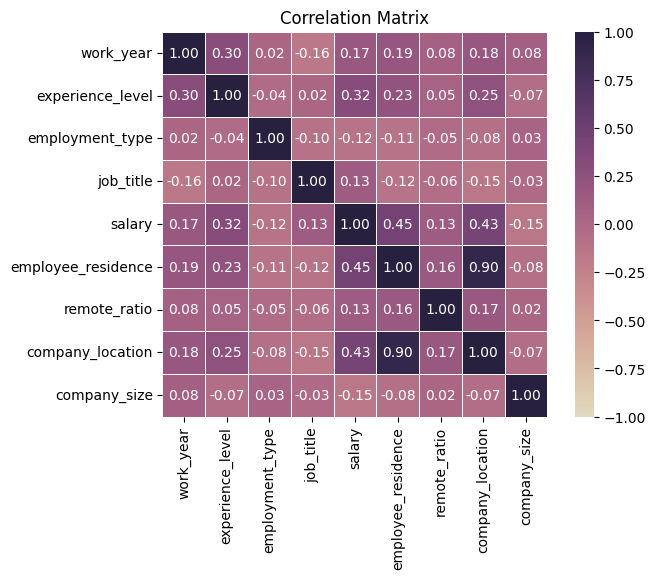

In [142]:
# PLOTTING A HEATMAP OF CORRELATION MATRIX AMONG ALL VARIABLES
plot_correlation_matrix(df)

From the correlation matrix we observe the following :-
*   The salary seems to have a fair correlation with company location, employee residence and experience level.
*   The employee residence seems to have a strong correlation with company location since most companies would have a hybrid work environment.



